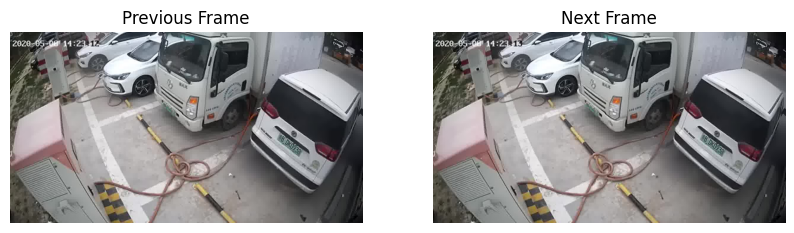

In [18]:
from halib import *
import cv2
prev_frame_path = "./test_frames/output_0000720.jpg"
# next_frame_path = "./test_frames/output_0000721.jpg"
next_frame_path = "./test_frames/output_0000725.jpg"


# show these two in plot

def show_frames(prev_frame, next_frame):
    prev_img = cv2.imread(prev_frame)
    next_img = cv2.imread(next_frame)

    # Convert BGR to RGB for matplotlib
    prev_img_rgb = cv2.cvtColor(prev_img, cv2.COLOR_BGR2RGB)
    next_img_rgb = cv2.cvtColor(next_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(prev_img_rgb)
    plt.title("Previous Frame")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(next_img_rgb)
    plt.title("Next Frame")
    plt.axis('off')

    plt.show()
show_frames(prev_frame_path, next_frame_path)

In [19]:
import cv2
import numpy as np

# Load frames
frame_a = cv2.imread(prev_frame_path, cv2.IMREAD_GRAYSCALE)
frame_b = cv2.imread(next_frame_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
frame_a = cv2.GaussianBlur(frame_a, (5, 5), 0)
frame_b = cv2.GaussianBlur(frame_b, (5, 5), 0)

# Compute absolute difference
diff = cv2.absdiff(frame_a, frame_b)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(
    diff, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Morphological operation to remove noise
kernel = np.ones((3, 3), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Save or display result
cv2.imwrite("change_mask.jpg", thresh)

True

In [ ]:
import cv2
import numpy as np

# https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/

# Load frames (grayscale for simplicity)
frame_a = cv2.imread(prev_frame_path, cv2.IMREAD_GRAYSCALE)
frame_b = cv2.imread(next_frame_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
frame_a_blur = cv2.GaussianBlur(frame_a, (5, 5), 0)
frame_b_blur = cv2.GaussianBlur(frame_b, (5, 5), 0)

# Compute absolute difference
diff = cv2.absdiff(frame_a_blur, frame_b_blur)

# Apply adaptive thresholding
# Parameters: maxValue=255, adaptiveMethod=Gaussian, thresholdType=BINARY,
# blockSize=11 (neighborhood size, must be odd), C=constant subtracted from mean
thresh = cv2.adaptiveThreshold(
    diff, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Apply morphological operations to remove noise
kernel = np.ones((5, 5), np.uint8)
thresh = cv2.erode(thresh, kernel, iterations=1)
thresh = cv2.dilate(thresh, kernel, iterations=1)

# Find contours of changed regions
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter small contours (noise)
min_area = 100  # Adjust based on application
significant_changes = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Draw changes on original frame
output = cv2.cvtColor(frame_a, cv2.COLOR_GRAY2BGR)
for cnt in significant_changes:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 2)

cv2.imwrite("changes_detected_adaptive.jpg", output)

True

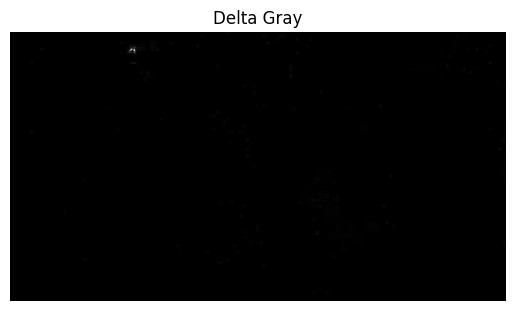

Median of Delta Gray: 64.5


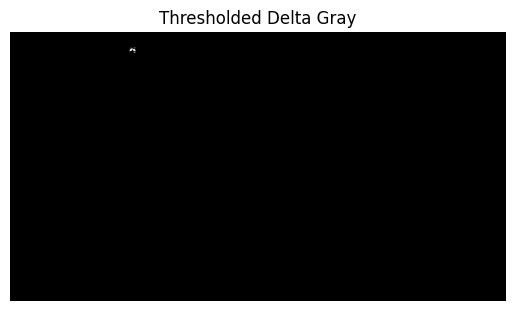

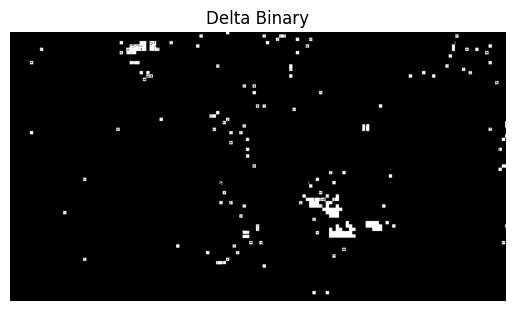

In [14]:
def show_img(img, title="Image", strected=True):
    if strected:
        # Stretch the image to 0-255 range for better visualization
        # This is useful for grayscale images or images with low contrast
        plot_img = (
            (img.astype(np.float32) - img.min()) / (img.max() - img.min())
        ) * 255
        plot_img = plot_img.astype(np.uint8)
    else:
        plot_img = img
    plt.imshow(plot_img, cmap="gray" if len(img.shape) == 2 else None, vmin=0, vmax=255)
    plt.title(title)
    plt.axis("off")
    plt.show()


# read a convert two frames to numpy arrays (RGB)
def read_img(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return np.array(img_rgb)


prev_frame = read_img(prev_frame_path)
cframe = read_img(next_frame_path)

rows, cols = prev_frame.shape[:2]

delta = cv2.absdiff(prev_frame, cframe)
delta_gray = cv2.cvtColor(delta, cv2.COLOR_BGR2GRAY)
show_img(delta_gray, "Delta Gray")

# get median of the delta gray
median = np.median(np.unique(delta_gray))
print(f"Median of Delta Gray: {median}")

# threshold the delta gray
_, thresh = cv2.threshold(delta_gray, median, 5, cv2.THRESH_BINARY)
show_img(thresh, "Thresholded Delta Gray")

_, delta_bin = cv2.threshold(
    delta_gray, 1, 5, cv2.THRESH_BINARY
)
show_img(delta_bin, "Delta Binary")

C:\Users\ha\AppData\Local\Temp\ipykernel_68024\1673302704.py:6: RuntimeWarning: invalid value encountered in divide
  (img.astype(np.float32) - img.min()) / (img.max() - img.min())
C:\Users\ha\AppData\Local\Temp\ipykernel_68024\1673302704.py:8: RuntimeWarning: invalid value encountered in cast
  plot_img = plot_img.astype(np.uint8)


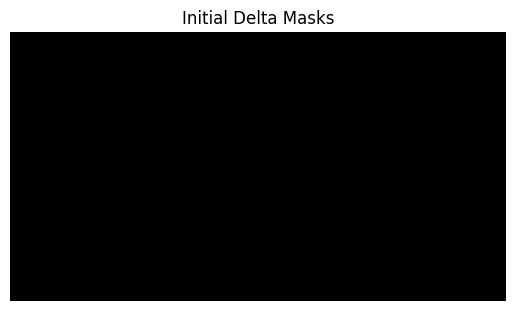

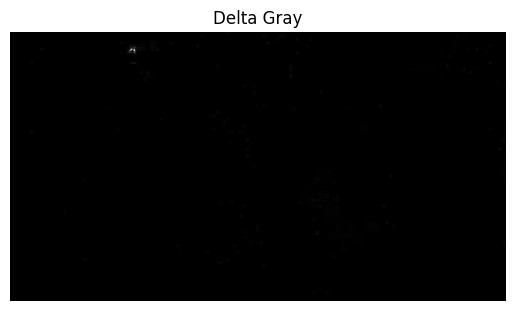

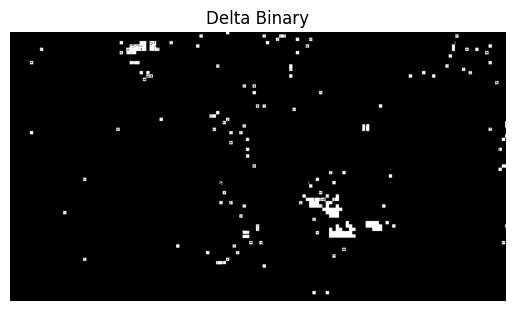

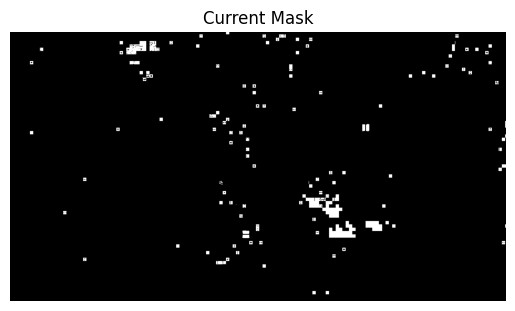

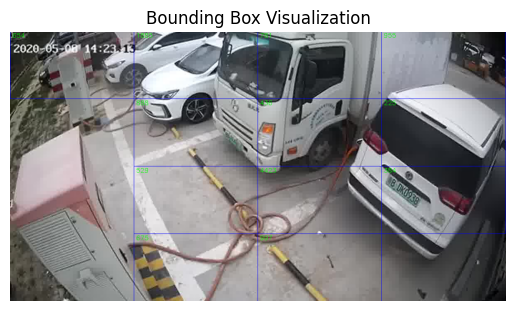

In [ ]:
# pprint(f'rows: {rows}, cols: {cols}')
deltaMasks = np.zeros((rows, cols), dtype=np.uint8)

show_img(deltaMasks, "Initial Delta Masks")

# pprint(f"deltamask shape: {delta.shape}, {delta.shape}")



# visualize the delta


diff_frame_threshold = 1

impack_plus_one = 5

_, delta_bin = cv2.threshold(

    delta_gray, diff_frame_threshold, impack_plus_one, cv2.THRESH_BINARY
)

show_img(delta_bin, "Delta Binary")


deltaMasks += delta_bin

deltaMasks = np.minimum(deltaMasks, 25).astype(np.uint8)

deltaMasks = cv2.subtract(deltaMasks, 1)



MASK_THRESHOLD = 4

curMask = cv2.compare(deltaMasks, MASK_THRESHOLD, cv2.CMP_GE)


show_img(curMask, "Current Mask")


rowStep = rows // 4

colStep = cols // 4

minWs = int(cols * 0.75)

minHs = int(rows * 0.75)



def get_non_zero_bounding_box(mask, rowStep, colStep, minWs, minHs, nonZeroTH=200, frame=None):

    rows, cols = mask.shape

    x0, y0 = cols, rows

    x1, y1 = 0, 0

    vis_frame = frame.copy() if frame is not None else None


    nonZeroTotal = 0

    nonZeroInsideBox = 0

    ##  || .... x0 (col), y0 (row) ....... ||

    ##  || ................................||

    ##  || ....................(x1, y1) ...||


    for row_idx in range(0, rows, rowStep):

        for col_idx in range(0, cols, colStep):

            block_h = min(rowStep, rows - row_idx)

            block_w = min(colStep, cols - col_idx)

            block = curMask[row_idx : row_idx + block_h, col_idx : col_idx + block_w]

            nonZero = cv2.countNonZero(block)

            nonZeroTotal += nonZero


            if nonZero < nonZeroTH:

                continue

            nonZeroInsideBox += nonZero


            x0 = min(x0, col_idx)

            y0 = min(y0, row_idx)

            x1 = max(x1, col_idx + block_w)

            y1 = max(y1, row_idx + block_h)


            if frame is not None:

                # Draw the rectangle of the block on the frame with red color

                cv2.rectangle(

                    vis_frame,

                    (col_idx, row_idx),

                    (col_idx + block_w, row_idx + block_h),

                    (0, 0, 255),  # Red color in BGR

                    1,  # Thickness of the rectangle
                )

                # also the raw the text of the non-zero count with green color

                cv2.putText(

                    vis_frame,

                    str(nonZero),

                    (col_idx + 5, row_idx + 15),

                    cv2.FONT_HERSHEY_SIMPLEX,

                    0.5,

                    (0, 255, 0),  # Green color in BGR

                    1,  # Thickness of the text
                )


    if x0 < x1 and y0 < y1:

        # Valid bounding box found

        # Ensure the bounding box is at least minWs x minHs

        roi = [x0, y0, x1 - x0, y1 - y0] # [x, y, w, h]


        if roi[2] < minWs:

            roi[0] = max(

                0,
                min(

                    cols - minWs,

                    roi[0] - (minWs - roi[2]) // 2,
                ),
            )

            roi[2] = minWs


        if roi[3] < minHs:

            roi[1] = max(

                0,
                min(

                    rows - minHs,

                    roi[1] - (minHs - roi[3]) // 2,
                ),
            )

            roi[3] = minHs

        return roi, nonZeroTotal, nonZeroInsideBox, vis_frame

    else:

        # No valid bounding box (no blocks passed the threshold)

        return None, 0, 0, None

roi, nonZeroTotal, nonZeroInsideBox, vis_frame = get_non_zero_bounding_box(

    curMask, rowStep, colStep, minWs, minHs, nonZeroTH=200, frame=cframe
)

if vis_frame is not None:

    show_img(vis_frame, "Bounding Box Visualization")